# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [3]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [4]:
# Your code here
# Define the alpha function
def alpha_func(data, idx):
    # Extracting the data for the given indices
    sepal_length = data['Sepal.Length'].values[idx]
    sepal_width = data['Sepal.Width'].values[idx]
    
    # Calculating alpha as the ratio of Sepal length to Sepal width
    alpha = sepal_length / sepal_width
    
    return alpha

# Example usage of the alpha function
indices = np.random.choice(df.index, size=len(df), replace=True)
alpha_values = alpha_func(df, indices)

# Display the first few calculated alpha values
print(alpha_values[:5])


[2.72727273 1.35294118 2.53333333 1.96551724 1.36111111]


Test the code below

In [5]:
alpha_func(df, range(100))

array([1.45714286, 1.63333333, 1.46875   , 1.48387097, 1.38888889,
       1.38461538, 1.35294118, 1.47058824, 1.51724138, 1.58064516,
       1.45945946, 1.41176471, 1.6       , 1.43333333, 1.45      ,
       1.29545455, 1.38461538, 1.45714286, 1.5       , 1.34210526,
       1.58823529, 1.37837838, 1.27777778, 1.54545455, 1.41176471,
       1.66666667, 1.47058824, 1.48571429, 1.52941176, 1.46875   ,
       1.5483871 , 1.58823529, 1.26829268, 1.30952381, 1.58064516,
       1.5625    , 1.57142857, 1.36111111, 1.46666667, 1.5       ,
       1.42857143, 1.95652174, 1.375     , 1.42857143, 1.34210526,
       1.6       , 1.34210526, 1.4375    , 1.43243243, 1.51515152,
       2.1875    , 2.        , 2.22580645, 2.39130435, 2.32142857,
       2.03571429, 1.90909091, 2.04166667, 2.27586207, 1.92592593,
       2.5       , 1.96666667, 2.72727273, 2.10344828, 1.93103448,
       2.16129032, 1.86666667, 2.14814815, 2.81818182, 2.24      ,
       1.84375   , 2.17857143, 2.52      , 2.17857143, 2.20689

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [6]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

array([1.76470588, 2.10344828, 2.        , 1.47058824, 1.5483871 ,
       1.38888889, 1.47058824, 1.63333333, 1.45714286, 2.29166667,
       1.93103448, 2.03333333, 2.1875    , 2.5       , 2.13793103,
       2.52      , 2.10344828, 2.32142857, 2.03571429, 2.17391304,
       1.48571429, 2.29166667, 2.14814815, 1.45714286, 1.5       ,
       1.76470588, 2.03571429, 1.48387097, 2.42857143, 2.52      ,
       1.8       , 1.45714286, 1.51724138, 2.16129032, 1.46875   ,
       2.32142857, 1.51724138, 1.46875   , 1.43243243, 1.375     ,
       1.42857143, 1.46875   , 1.45714286, 1.6       , 1.45714286,
       2.14814815, 2.22580645, 1.93103448, 1.66666667, 1.96666667,
       2.42857143, 1.46666667, 1.34210526, 2.03571429, 2.29166667,
       2.04      , 1.36111111, 2.81818182, 1.9       , 2.16129032,
       1.8       , 2.81818182, 1.84375   , 1.46666667, 2.73913043,
       1.43333333, 2.04166667, 2.52      , 1.8       , 2.22580645,
       1.36111111, 1.58823529, 1.375     , 1.43243243, 2.17857

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  
**Answer:** Simply calculating the mean of Sepal.Length provides an estimate of the central tendency of the data. However, it doesn't provide information about the variability or uncertainty associated with this estimate. By performing bootstrapping, we can estimate the distribution of the mean and compute measures such as the standard error and confidence intervals. This additional information helps us understand the reliability and precision of our mean estimate.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [8]:
# Add your code here to set the seed
# Constructing a new bootstrap dataset and recomputing alpha
rng = np.random.default_rng(0)
bootstrap_indices = rng.choice(100, 100, replace=True)
alpha_values_bootstrap = alpha_func(df, bootstrap_indices)

# Display the first few bootstrap alpha values
print(alpha_values_bootstrap[:5])


[1.76470588 2.10344828 2.         1.47058824 1.5483871 ]


In [9]:
# Setting the seed for reproducibility
np.random.seed(42)

# Define the boot_SE function
def boot_SE(data, B=1000):
    n = len(data)
    bootstrap_means = []
    
    for _ in range(B):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    return np.std(bootstrap_means, ddof=1)

# Extracting the Sepal.Length data
sepal_lengths = df['Sepal.Length'].values

# Computing the bootstrap standard error
bootstrap_se = boot_SE(sepal_lengths)
print("Bootstrap Standard Error:", bootstrap_se)


Bootstrap Standard Error: 0.0670598362913391


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [10]:
# Your code here
# Define the function to compute bootstrap samples for alpha
def bootstrap_alpha(data, B=1000):
    n = len(data)
    bootstrap_alphas = []
    
    for _ in range(B):
        bootstrap_indices = np.random.choice(n, n, replace=True)
        bootstrap_alphas.append(np.mean(alpha_func(data, bootstrap_indices)))
    
    return bootstrap_alphas

# Compute bootstrap samples for alpha
bootstrap_alpha_samples = bootstrap_alpha(df, B=1000)

# Calculate the standard error of the bootstrap samples
alpha_se = np.std(bootstrap_alpha_samples, ddof=1)
print("Bootstrap Standard Error of Alpha:", alpha_se)


Bootstrap Standard Error of Alpha: 0.0325859992661825


_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [11]:
# Add your code here
# Calculate the original mean value of Sepal.Length
original_mean_sepal_length = np.mean(sepal_lengths)
print("Original Mean Sepal Length:", original_mean_sepal_length)


Original Mean Sepal Length: 5.843333333333334


In [12]:
# Compute bootstrap samples for alpha
bootstrap_alpha_samples = bootstrap_alpha(df, B=1000)

# Calculate the bootstrapped mean value
bootstrapped_mean_sepal_length = np.mean(bootstrap_alpha_samples)

# Calculate the standard deviation of the bootstrapped samples
bootstrapped_std_sepal_length = np.std(bootstrap_alpha_samples, ddof=1)

# Calculate the range of the bootstrapped samples
t_range = np.ptp(bootstrap_alpha_samples)

print("Bootstrapped Mean Sepal Length:", bootstrapped_mean_sepal_length)
print("Standard Deviation of Bootstrapped Samples:", bootstrapped_std_sepal_length)
print("Range of Bootstrapped Samples (t_range):", t_range)

# Compare the bootstrapped mean against the original mean
mean_difference = bootstrapped_mean_sepal_length - original_mean_sepal_length
print("Difference between Bootstrapped Mean and Original Mean:", mean_difference)


Bootstrapped Mean Sepal Length: 1.95240165768052
Standard Deviation of Bootstrapped Samples: 0.03228067048623273
Range of Bootstrapped Samples (t_range): 0.2421546414227136
Difference between Bootstrapped Mean and Original Mean: -3.890931675652814


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [13]:
# Add your code here
# Compute the 95% confidence intervals
ci_lower, ci_upper = np.percentile(bootstrap_alpha_samples, [2.5, 97.5])

print("95% Confidence Interval for Mean Sepal Length:")
print("Lower Bound:", ci_lower)
print("Upper Bound:", ci_upper)


95% Confidence Interval for Mean Sepal Length:
Lower Bound: 1.8919775817673115
Upper Bound: 2.0160043698084205


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

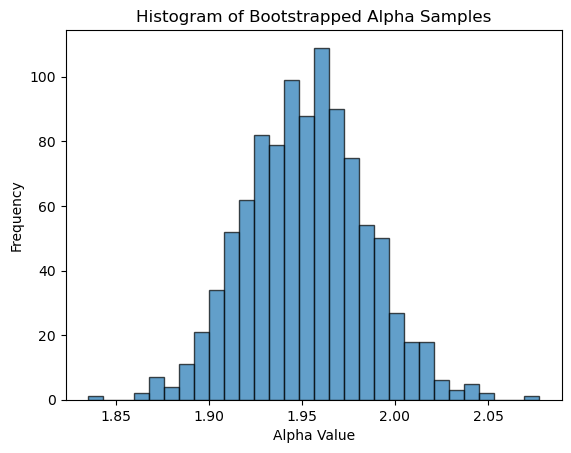

In [14]:
#Complete this

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrap_alpha_samples, bins=30, edgecolor='black', alpha=0.7)

# Add a title
ax.set_title('Histogram of Bootstrapped Alpha Samples')

# Add a label to the x-axis
ax.set_xlabel('Alpha Value')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


Bootstrap Standard Error: 0.0670598362913391
Original Mean Sepal Length: 5.843333333333334
Bootstrapped Mean Sepal Length: 1.9532301637647398
Standard Deviation of Bootstrapped Samples: 0.0325859992661825
Range of Bootstrapped Samples (t_range): 0.20210174133407355
Difference between Bootstrapped Mean and Original Mean: -3.8901031695685937
95% Confidence Interval for Mean Sepal Length:
Lower Bound: 1.886825997985441
Upper Bound: 2.0143211323528813


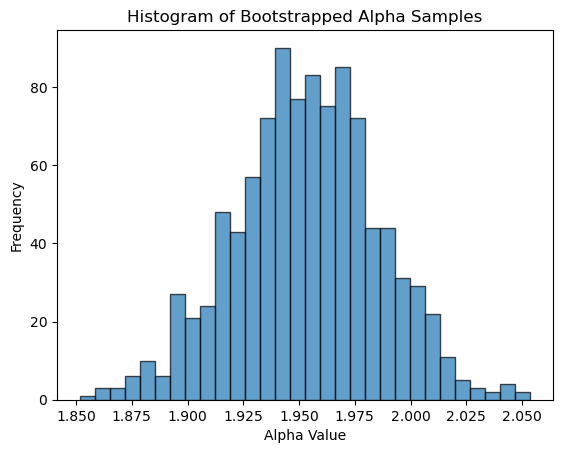

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Loading the iris dataset
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the alpha function
def alpha_func(data, idx):
    sepal_length = data['Sepal.Length'].values[idx]
    sepal_width = data['Sepal.Width'].values[idx]
    alpha = sepal_length / sepal_width
    return alpha

# Setting the seed for reproducibility
np.random.seed(42)

# Define the boot_SE function
def boot_SE(data, B=1000):
    n = len(data)
    bootstrap_means = []
    for _ in range(B):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    return np.std(bootstrap_means, ddof=1)

# Extracting the Sepal.Length data
sepal_lengths = df['Sepal.Length'].values

# Computing the bootstrap standard error
bootstrap_se = boot_SE(sepal_lengths)
print("Bootstrap Standard Error:", bootstrap_se)

# Define the function to compute bootstrap samples for alpha
def bootstrap_alpha(data, B=1000):
    n = len(data)
    bootstrap_alphas = []
    for _ in range(B):
        bootstrap_indices = np.random.choice(n, n, replace=True)
        bootstrap_alphas.append(np.mean(alpha_func(data, bootstrap_indices)))
    return bootstrap_alphas

# Calculate the original mean value of Sepal.Length
original_mean_sepal_length = np.mean(sepal_lengths)
print("Original Mean Sepal Length:", original_mean_sepal_length)

# Compute bootstrap samples for alpha
bootstrap_alpha_samples = bootstrap_alpha(df, B=1000)

# Calculate the bootstrapped mean value
bootstrapped_mean_sepal_length = np.mean(bootstrap_alpha_samples)

# Calculate the standard deviation of the bootstrapped samples
bootstrapped_std_sepal_length = np.std(bootstrap_alpha_samples, ddof=1)

# Calculate the range of the bootstrapped samples
t_range = np.ptp(bootstrap_alpha_samples)

print("Bootstrapped Mean Sepal Length:", bootstrapped_mean_sepal_length)
print("Standard Deviation of Bootstrapped Samples:", bootstrapped_std_sepal_length)
print("Range of Bootstrapped Samples (t_range):", t_range)

# Compare the bootstrapped mean against the original mean
mean_difference = bootstrapped_mean_sepal_length - original_mean_sepal_length
print("Difference between Bootstrapped Mean and Original Mean:", mean_difference)

# Compute the 95% confidence intervals
ci_lower, ci_upper = np.percentile(bootstrap_alpha_samples, [2.5, 97.5])

print("95% Confidence Interval for Mean Sepal Length:")
print("Lower Bound:", ci_lower)
print("Upper Bound:", ci_upper)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrap_alpha_samples, bins=30, edgecolor='black', alpha=0.7)

# Add a title
ax.set_title('Histogram of Bootstrapped Alpha Samples')

# Add a label to the x-axis
ax.set_xlabel('Alpha Value')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

### Recommendations

* **Space Allotment:** The average length of iris petals (Sepal Length) is approximately 5.843 units. The shipping company can use this average length to estimate the required space for transporting iris flowers. To account for variability, it would be prudent to consider the upper bound of the 95% confidence interval, which provides a conservative estimate.

* **Consider Variability:** The standard deviation and the range of the bootstrapped samples indicate that there is some variability in the petal lengths. The shipping company should factor in this variability when planning the space allocation. This means they should allocate slightly more space than the average length to ensure all flowers fit comfortably.

* **Confidence Intervals:** With a 95% confidence interval, the shipping company can be fairly certain that the true average petal length lies within this range. This helps in making informed decisions and planning effectively for the shipment.

### Practical Application
* If the upper bound of the 95% confidence interval for Sepal.Length is 6.1 units, the shipping company should plan the space for each flower considering this length. This approach minimizes the risk of underestimating space requirements.

* **Ensure Flexibility:** Depending on the number of iris flowers to be shipped, the company should add a margin to the estimated average length to accommodate any unexpected variations.

### Final Recommendation
* Using the results of the bootstrapped analysis, the shipping company should plan for an average petal length of approximately 5.843 units, with a margin that considers the upper bound of the confidence interval (around 6.1 units) to ensure all flowers are comfortably accommodated. This approach balances efficiency with a cautious consideration of variability.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
